#How to install Pytrends?

In [ ]:
pip install pytrends

#Connect to Google

In [2]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
Trending_topics = TrendReq(hl='en-US', tz=360)

#Build Payload

In [3]:
kw_list=["Cloud Computing"]
Trending_topics.build_payload(kw_list,cat=0, timeframe='today 12-m')

#Interest Over Time

In [4]:
Trending_topics.build_payload(kw_list=["Cloud Computing"],
                              cat=0, timeframe='today 12-m')
data = Trending_topics.interest_over_time()
data = data.sort_values(by="Cloud Computing", ascending = False)
data = data.head(10)
print(data)

            Cloud Computing  isPartial
date                                  
2024-01-28              100      False
2024-01-07               99      False
2024-02-25               96      False
2024-04-28               96      False
2024-01-21               96      False
2024-05-05               95      False
2024-12-01               95      False
2024-02-18               94      False
2024-02-04               94      False
2024-11-17               94      False


#Historical Hour Interest

In [5]:
kw_list = ["Cloud Computing"]
Trending_topics.build_payload(kw_list, cat=0, timeframe='2018-01-01 2018-02-01', geo='', gprop='')
data = Trending_topics.interest_over_time()
data = data.sort_values(by="Cloud Computing", ascending = False)
data = data.head(10)
print(data)

            Cloud Computing  isPartial
date                                  
2018-01-30              100      False
2018-01-18               97      False
2018-02-01               96      False
2018-01-08               94      False
2018-01-11               91      False
2018-01-04               90      False
2018-01-10               90      False
2018-01-24               90      False
2018-01-22               89      False
2018-01-09               88      False


#Interest By Region

In [10]:
data = Trending_topics.interest_by_region()
data = data.sort_values(by="Cloud Computing",
                        ascending = False)
data = data.head(10)
data

,Cloud Computing
geoName,
Ethiopia,100
Zimbabwe,89
Nepal,67
India,66
Cameroon,55
Kenya,49
Sri Lanka,48
Ghana,40
Pakistan,36


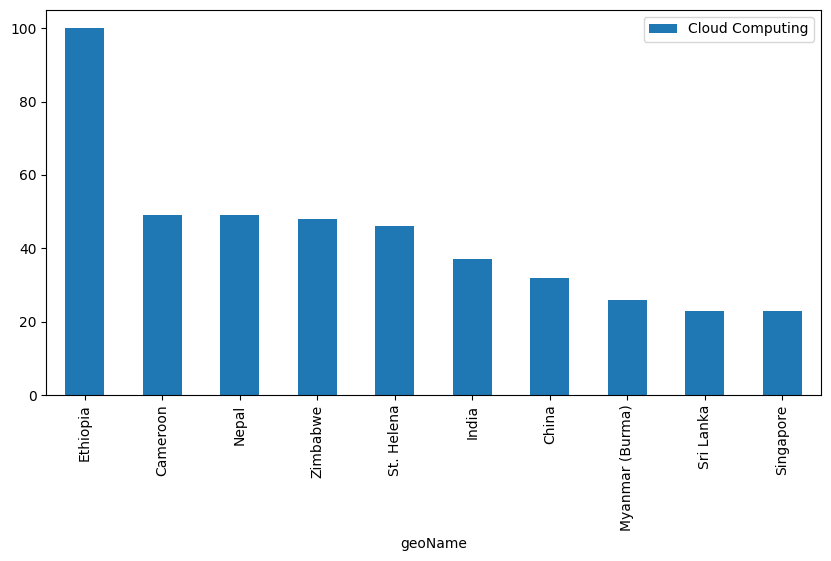

In [7]:
data.reset_index().plot(x='geoName', y='Cloud Computing',
                        figsize=(10,5), kind="bar")
plt.style.use('fivethirtyeight')
plt.show()

#Top Charts

In [8]:
df = Trending_topics.top_charts(2020, hl='en-US',
                                tz=300, geo='GLOBAL')
df.head(10)

,title,exploreQuery
0,Coronavirus,
1,Election results,
2,Kobe Bryant,
3,Zoom,
4,IPL,
5,India vs New Zealand,
6,Coronavirus update,
7,Coronavirus symptoms,
8,Joe Biden,
9,Google Classroom,


#Related Queries

In [9]:
try:
    Trending_topics.build_payload(kw_list=['Cloud Computing'])
    related_queries = Trending_topics.related_queries()
    related_queries.values()
except (KeyError, IndexError):
    print("No related queries found for 'Cloud Computing'")

No related queries found for 'Cloud Computing'


#Keyword Suggestions

In [11]:
keywords = Trending_topics.suggestions(
  keyword='Cloud Computing')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')

,title,type
0,Cloud computing,Topic
1,Cloud computing,Topic
2,Cloud computing security,Topic
3,Alibaba Cloud,Computer software company
4,Private cloud computing infrastructure,Topic
